## Data Augmentation and Image Pipelines

 - Real Life Datasets Can Be Large Or Small
 - Image Pipelines Are An Efficient Way To Handle Large Datasets
 - Data Augmentation Is Technique Of Augmenting Data, Which Acts As A Regularizer Hence Reduces Overfitting

### Dataset 

 - **Tiny ImageNet 200**
 - **1,20,000 Images**
 - **200 Classes**
 - 500 Training, 50 Validation and 50 Test Images For Each Class
 - A Subset Of The ImageNet Dataset (1 Million Images and 1000 Classes)

In [1]:
import numpy as np
import keras
import os
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [2]:
train_image_gen = ImageDataGenerator(
    rescale = 1/255.0,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.3,
    horizontal_flip = True
)

In [3]:
test_gen = ImageDataGenerator(
    rescale = 1/255.0
)

In [4]:
train_gen = train_image_gen.flow_from_directory(
    "tiny-imagenet-200/train",
    target_size = ((224,224)),
    batch_size = 128,
    class_mode = 'categorical'
)

Found 100000 images belonging to 200 classes.


In [5]:
print(train_gen.class_indices)

{'n01443537': 0, 'n01629819': 1, 'n01641577': 2, 'n01644900': 3, 'n01698640': 4, 'n01742172': 5, 'n01768244': 6, 'n01770393': 7, 'n01774384': 8, 'n01774750': 9, 'n01784675': 10, 'n01855672': 11, 'n01882714': 12, 'n01910747': 13, 'n01917289': 14, 'n01944390': 15, 'n01945685': 16, 'n01950731': 17, 'n01983481': 18, 'n01984695': 19, 'n02002724': 20, 'n02056570': 21, 'n02058221': 22, 'n02074367': 23, 'n02085620': 24, 'n02094433': 25, 'n02099601': 26, 'n02099712': 27, 'n02106662': 28, 'n02113799': 29, 'n02123045': 30, 'n02123394': 31, 'n02124075': 32, 'n02125311': 33, 'n02129165': 34, 'n02132136': 35, 'n02165456': 36, 'n02190166': 37, 'n02206856': 38, 'n02226429': 39, 'n02231487': 40, 'n02233338': 41, 'n02236044': 42, 'n02268443': 43, 'n02279972': 44, 'n02281406': 45, 'n02321529': 46, 'n02364673': 47, 'n02395406': 48, 'n02403003': 49, 'n02410509': 50, 'n02415577': 51, 'n02423022': 52, 'n02437312': 53, 'n02480495': 54, 'n02481823': 55, 'n02486410': 56, 'n02504458': 57, 'n02509815': 58, 'n0266

(128, 224, 224, 3) (128, 200)


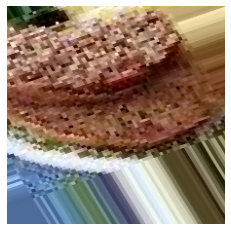

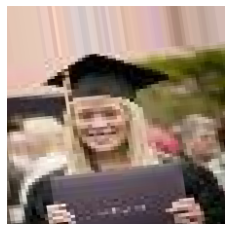

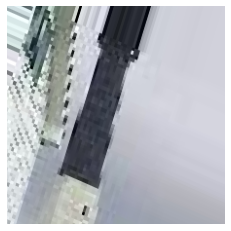

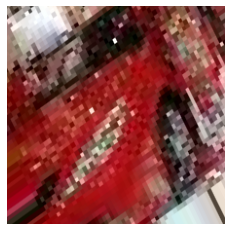

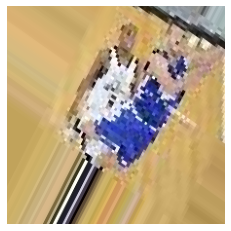

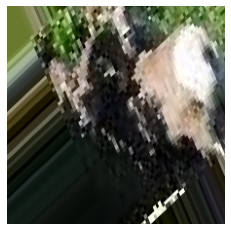

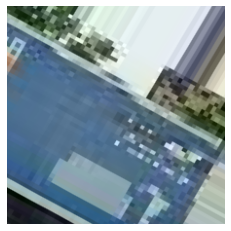

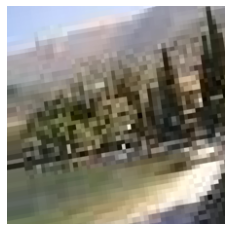

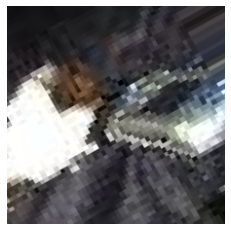

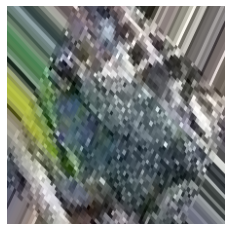

In [6]:
import matplotlib.pyplot as plt
for (x, y) in train_gen:
    print(x.shape, y.shape)
    for i in range(10):
        plt.imshow(x[i])
        plt.axis("off")
        plt.show()
    break

In [7]:
class_ids = train_gen.class_indices
def load_validation_data(target_size, no_of_classes):
    with open("tiny-imagenet-200/val/val_annotations.txt") as f:
        lines = f.readlines()
        
        m = len(lines)
        X = np.empty((m,*target_size,3)) #B,W,H,3
        Y = np.empty(m)
        
        for i, line in enumerate(lines):
            tokens = line.split()
            img_name = tokens[0]
            img_label = tokens[1]
            
            img_url = os.path.join("tiny-imagenet-200/val/images", img_name)
            img = image.load_img(img_url)
            img = img.resize(target_size)
            X[i,] = np.array(img, dtype=np.float32)/255.0
            img.close()
            Y[i] = class_ids[img_label]
            
        return X, keras.utils.to_categorical(Y, no_of_classes)

In [8]:
X_val, Y_val = load_validation_data((224,224), 200)
print(X_val.shape, Y_val.shape)

(10000, 224, 224, 3) (10000, 200)


In [1]:
# To Upload Half Of The Validation Images,
# 25 Images Of Each Class, Instead Of 50 Each Class

# class_ids = train_gen.class_indices
# num_dict = {}
# for i in range(200):
#     num_dict[i] = 0
# print(num_dict)

# def load_validation_data(target_size, no_of_classes):
#     with open("tiny-imagenet-200/val/val_annotations.txt") as f:
#         lines = f.readlines()
#         i_itr = 0
#         m = int(len(lines)/2)
#         print(m)
#         X = np.empty((m,227,227,3)) #B,W,H,3
#         Y = np.empty(m)
        
#         for i, line in enumerate(lines):
#             tokens = line.split()
#             img_name = tokens[0]
#             img_label = tokens[1]
            
#             classID = class_ids[img_label]
#             num_dict[classID] += 1
#             if(num_dict[classID] < 25):
#                 img_url = os.path.join("tiny-imagenet-200/val/images", img_name)
#                 img = image.load_img(img_url)
#                 img = img.resize(target_size)
#                 X[i_itr,] = np.array(img, dtype=np.float32)/255.0
#                 img.close()
#                 Y[i_itr] = class_ids[img_label]
#                 i_itr+=1
            
#         return X, keras.utils.to_categorical(Y, no_of_classes)

# X_val, Y_val = load_validation_data((227,227), 200)
# print(X_val.shape, Y_val.shape)